In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from statsmodels.distributions import ECDF
from scipy import stats
plt.style.use('dark_background')
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
train['total_price_log'] = np.log1p(train.total_price)
test = pd.read_csv('data/test.csv')
dataset = pd.concat([train, test], sort=False)

In [3]:
train.shape

(60000, 236)

## 移除價格的極端值

In [4]:
z = np.abs(stats.zscore(train.total_price))
threshold = 3
non_outlier_indices = np.where(z < 3)[0]
non_outlier_data = train.iloc[non_outlier_indices]

** Before **

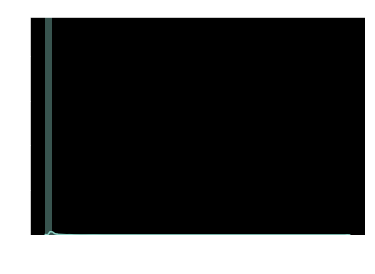

In [5]:
sns.distplot(train.total_price);

** After **

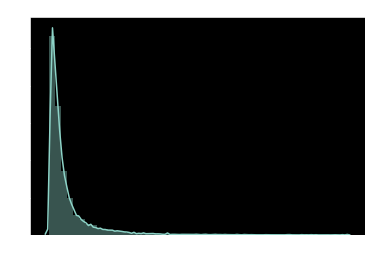

In [6]:
sns.distplot(non_outlier_data.total_price);

** log tranformation **

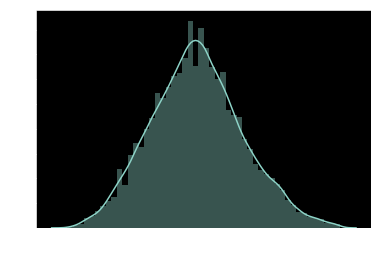

In [7]:
sns.distplot(non_outlier_data.total_price_log);

## 1.Baseline model
先從簡單的模型出發，建立Baseline模型，而後慢慢完善

** total_floor 顯示大部分的建築樓層數為5樓以下、樓層數看似與總價有所關聯 **

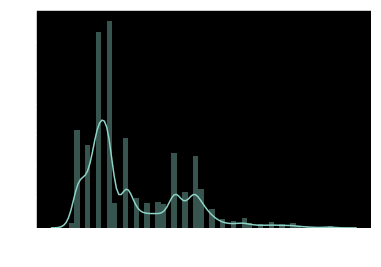

In [9]:
sns.distplot(non_outlier_data.total_floor);

In [12]:
(non_outlier_data.total_floor.value_counts() / len(non_outlier_data)).sort_index()

1     0.004659
2     0.089037
3     0.074926
4     0.177805
5     0.187559
6     0.022406
7     0.081244
8     0.027366
9     0.022842
10    0.023378
11    0.021735
12    0.067988
13    0.032260
14    0.064704
15    0.034907
16    0.016993
17    0.008010
18    0.006301
19    0.008681
20    0.004877
21    0.003871
22    0.004994
23    0.003754
24    0.004357
25    0.002145
26    0.001156
27    0.000402
28    0.001609
29    0.000034
Name: total_floor, dtype: float64

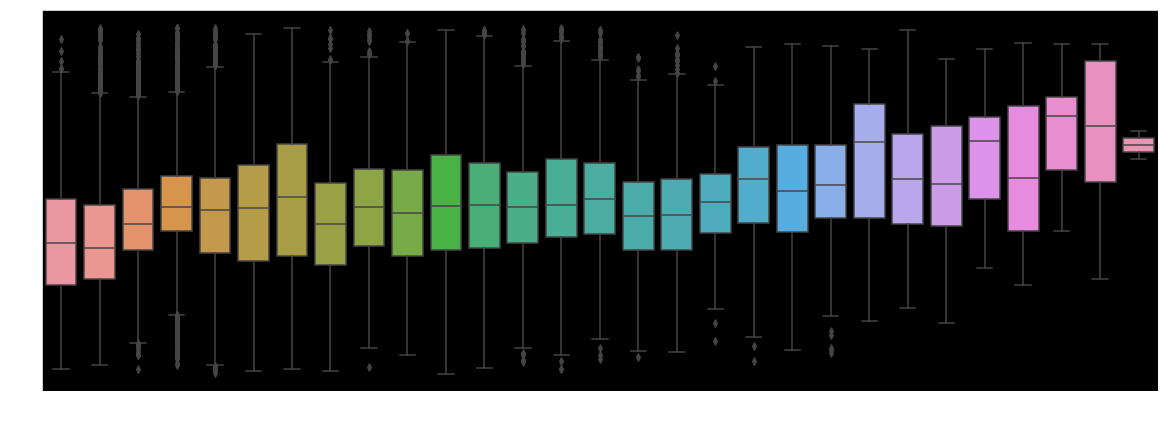

In [10]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="total_floor", y="total_price_log", data=non_outlier_data);

** txn_floor交易樓層 **

#### 參考資料
<a src='https://news.housefun.com.tw/news/article/70491577033.html'>樓層價差_1</a>
</br>
<a src='https://estate.ltn.com.tw/article/6989'>樓層價差_2</a>

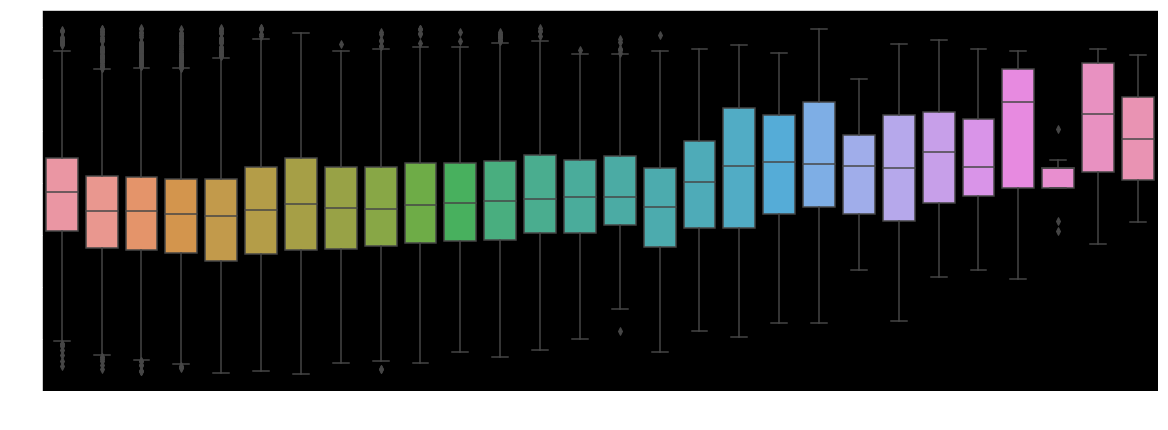

In [13]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="txn_floor", y="total_price_log", data=non_outlier_data);

** txn_dt交易日期 **

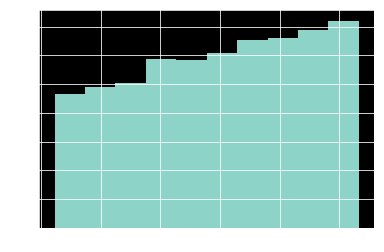

In [26]:
non_outlier_data.txn_dt.hist();

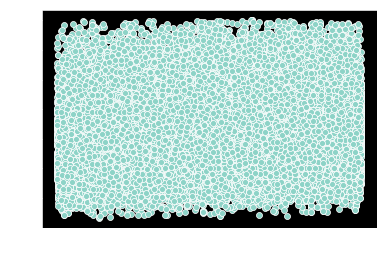

In [27]:
sns.scatterplot(x='txn_dt',y='total_price_log',data=non_outlier_data);

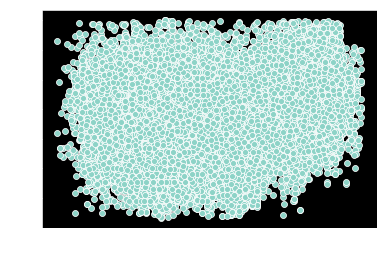

In [25]:
sns.scatterplot(x='building_complete_dt',y='total_price_log',data=non_outlier_data)

** building_material **

###### building_material是無序類別資料，且與總價有關聯

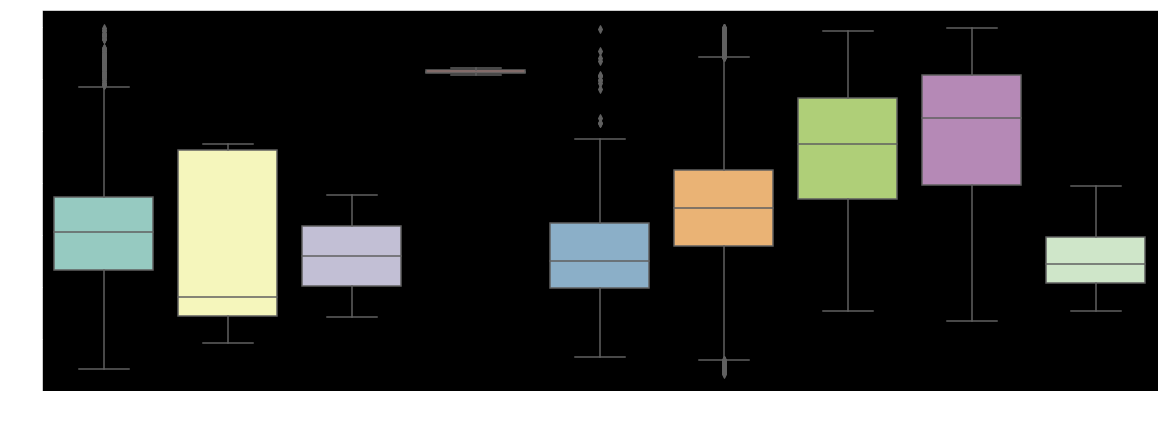

In [28]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="building_material", y="total_price_log", data=non_outlier_data);

** city **

###### city是無序類別資料，且與總價有關聯，7與13總價遠超於其他city

In [31]:
non_outlier_data.city.isnull().sum()

0

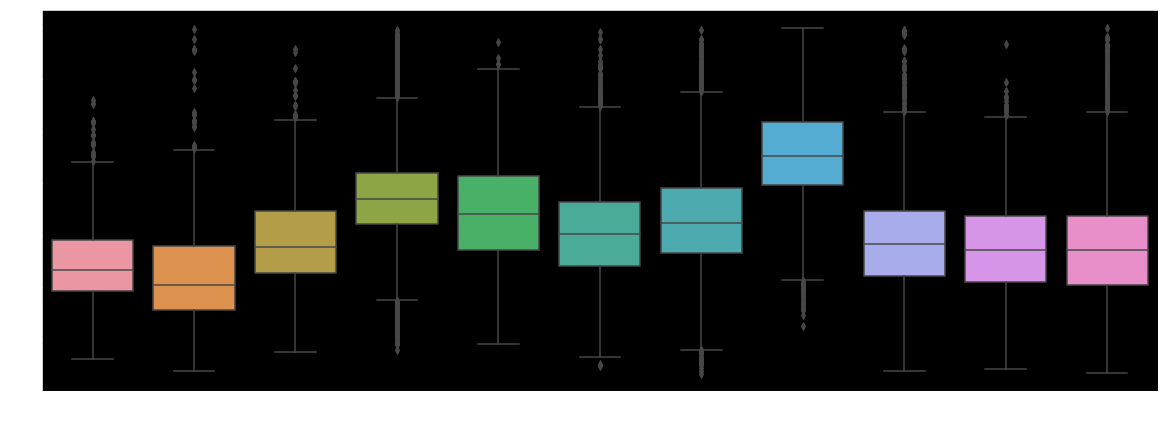

In [29]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="city", y="total_price_log", data=non_outlier_data);

** town **

###### town是無序類別資料，且與總價有關聯

In [32]:
non_outlier_data.town.isnull().sum()

0

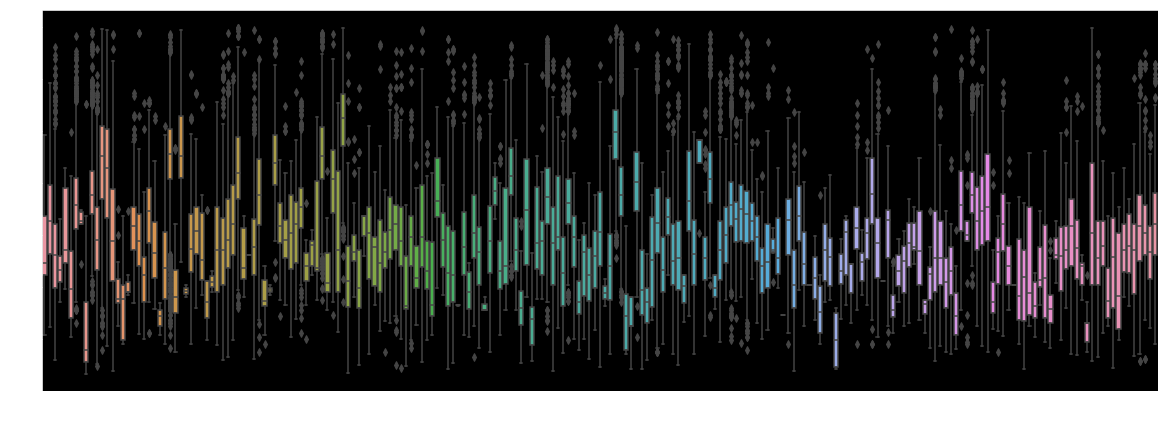

In [30]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="town", y="total_price_log", data=non_outlier_data);

** village **

In [42]:
non_outlier_data.village.isnull().sum()

0

In [39]:
#平均有21間建築物在同樣的village
len(non_outlier_data) / pd.unique(non_outlier_data.village).shape[0]

20.58364953432218

** building_type **

###### building_type是無序類別資料，且與總價有關聯

In [43]:
non_outlier_data.building_type.isnull().sum()

0

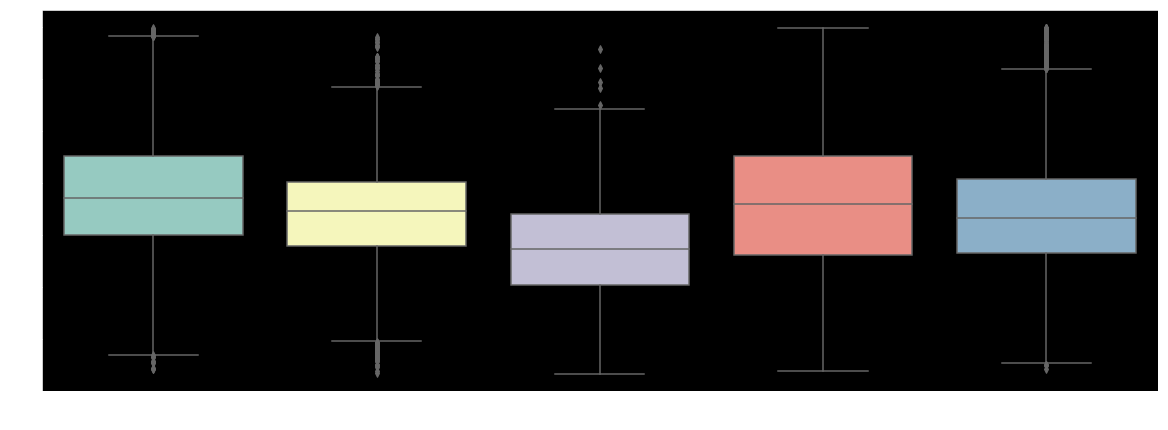

In [44]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="building_type", y="total_price_log", data=non_outlier_data);

** building_use **

###### building_use是無序類別資料，且與總價有關聯

In [46]:
non_outlier_data.building_use.isnull().sum()

0

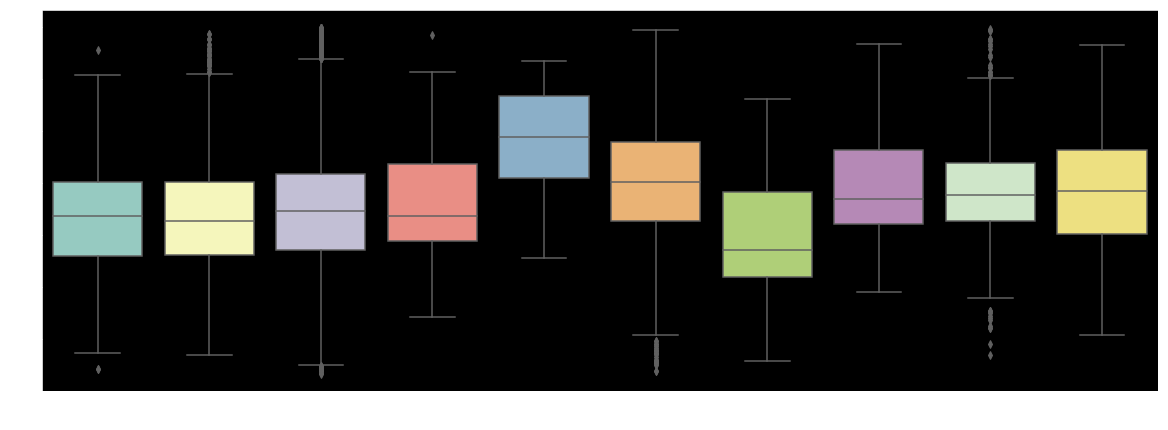

In [45]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="building_use", y="total_price_log", data=non_outlier_data);

###### parking_way是無序類別資料，且與總價有關聯

In [48]:
non_outlier_data.parking_way.isnull().sum()

0

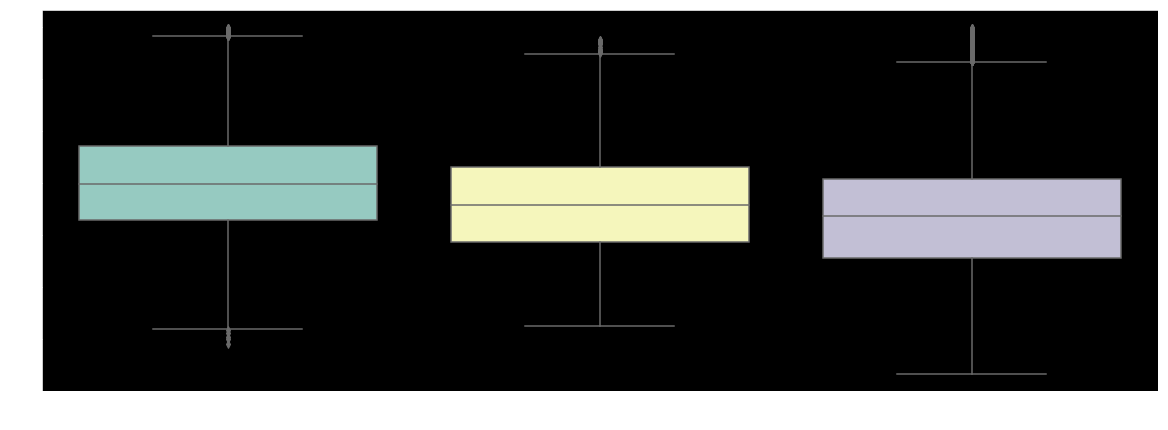

In [47]:
plt.figure(figsize=(20, 7));
ax = sns.boxplot(x="parking_way", y="total_price_log", data=non_outlier_data);

###### parking_area是數值型資料，且與總價有關聯，缺值達94%

In [51]:
non_outlier_data.parking_area.isnull().sum()

56612

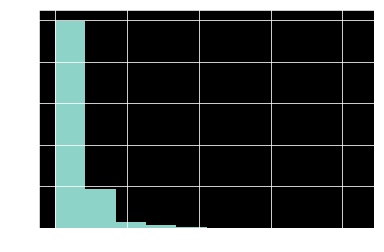

In [54]:
non_outlier_data.parking_area.hist();

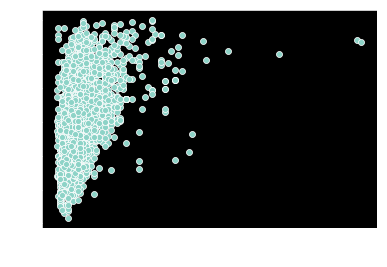

In [55]:
sns.scatterplot(x='parking_area',y='total_price_log',data=non_outlier_data);

** land_area **

###### land_area是數值型資料，與總價有明顯關聯，應刪去離群值減少影響

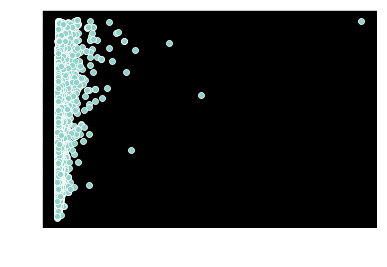

In [56]:
sns.scatterplot(x='land_area',y='total_price_log',data=non_outlier_data);

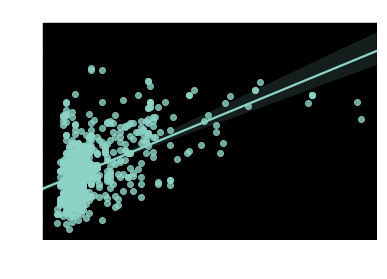

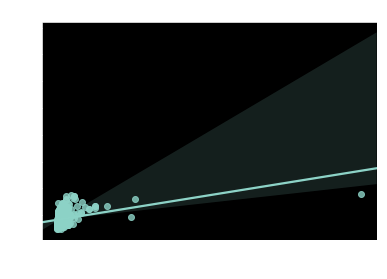

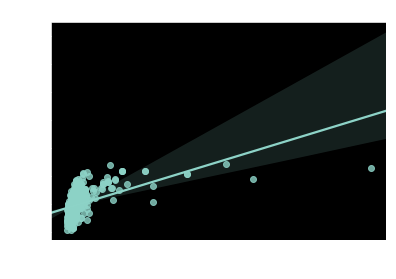

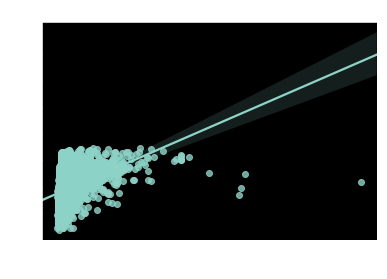

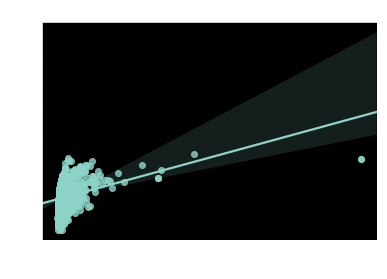

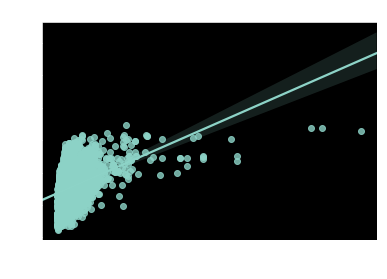

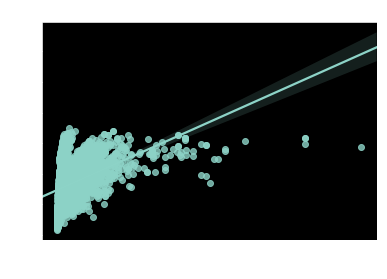

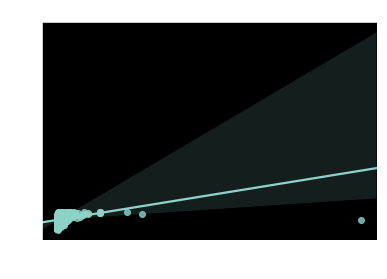

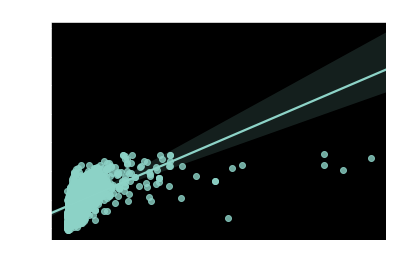

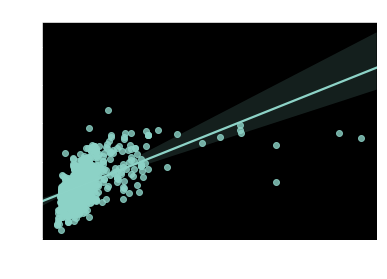

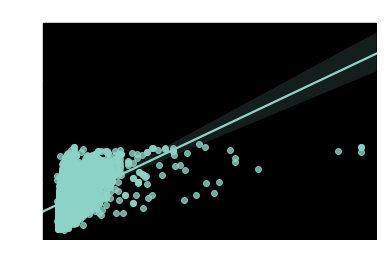

In [62]:
for param, group in non_outlier_data.groupby(['city']):
    sns.regplot(x='land_area',y='total_price_log',data=group);
    plt.title('City index: {}'.format(param))
    plt.show();

In [63]:
z = np.abs(stats.zscore(non_outlier_data.land_area))
threshold = 3
non_outlier_indices = np.where(z < 3)[0]
non_outlier_data = non_outlier_data.iloc[non_outlier_indices]

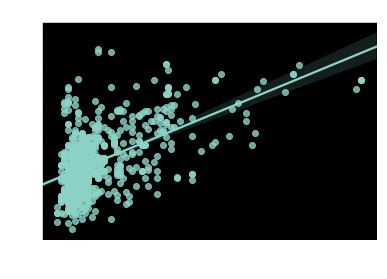

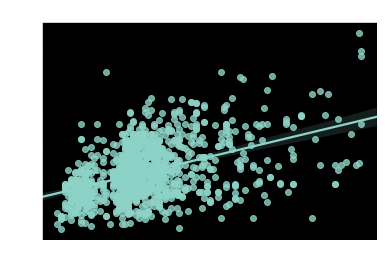

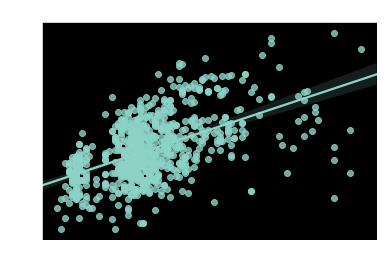

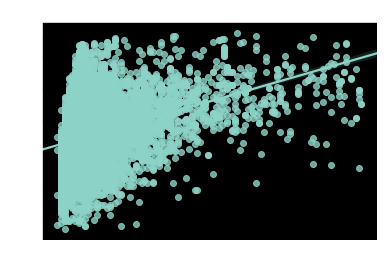

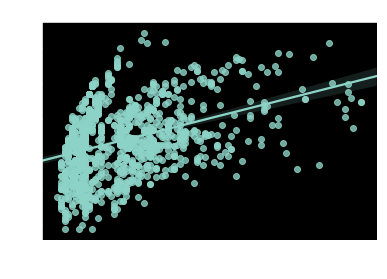

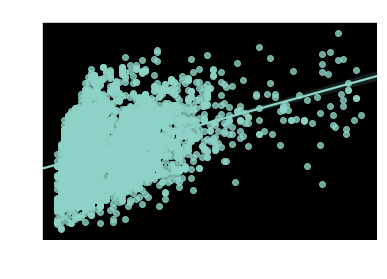

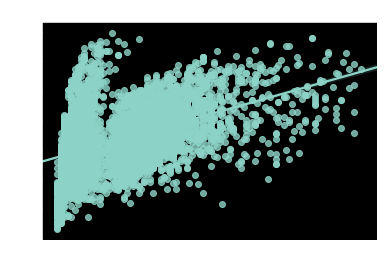

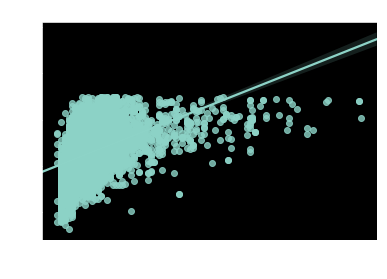

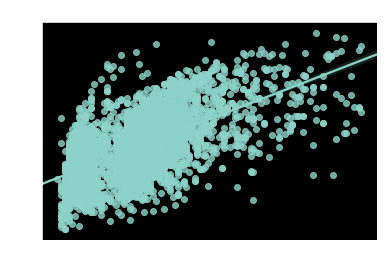

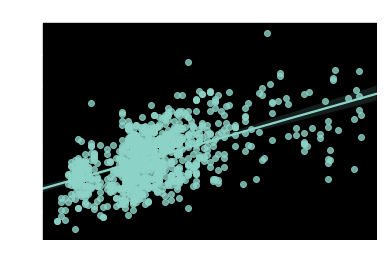

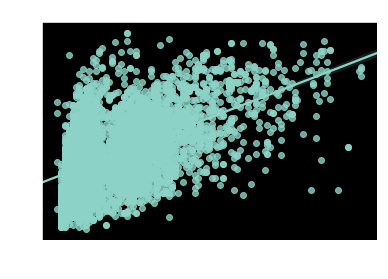

In [64]:
for param, group in non_outlier_data.groupby(['city']):
    sns.regplot(x='land_area',y='total_price_log',data=group);
    plt.title('City index: {}'.format(param))
    plt.show();

** building_area  **

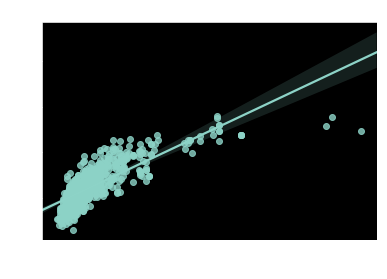

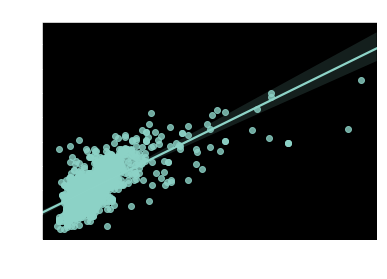

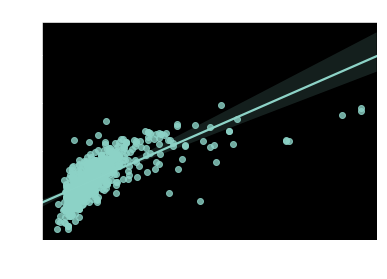

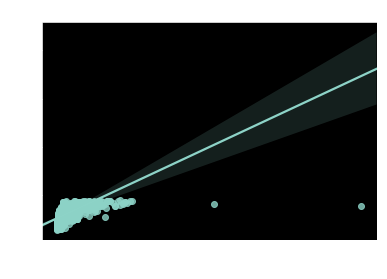

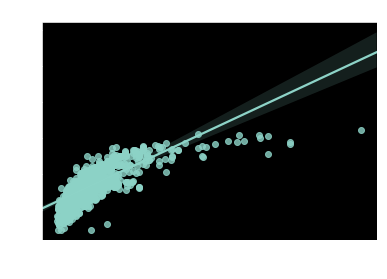

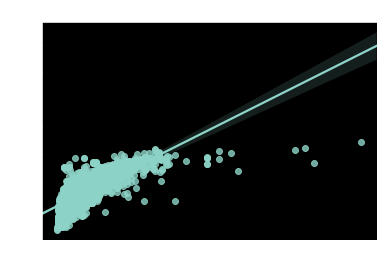

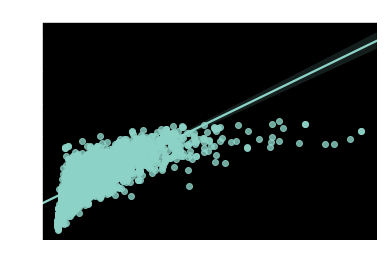

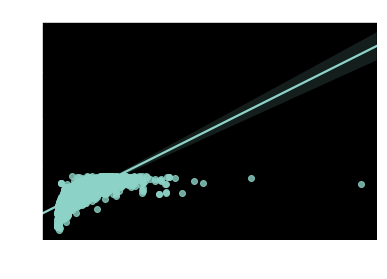

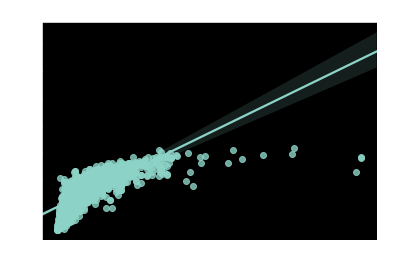

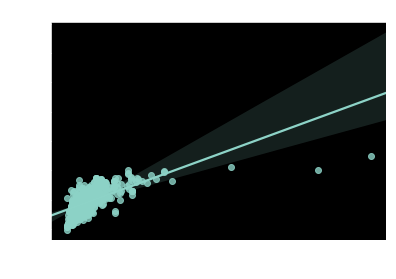

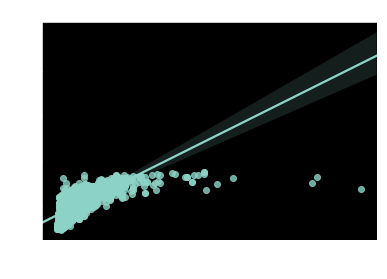

In [65]:
for param, group in non_outlier_data.groupby(['city']):
    sns.regplot(x='building_area',y='total_price_log',data=group);
    plt.title('City index: {}'.format(param))
    plt.show();

In [66]:
z = np.abs(stats.zscore(non_outlier_data.building_area))
threshold = 3
non_outlier_indices = np.where(z < 3)[0]
non_outlier_data = non_outlier_data.iloc[non_outlier_indices]

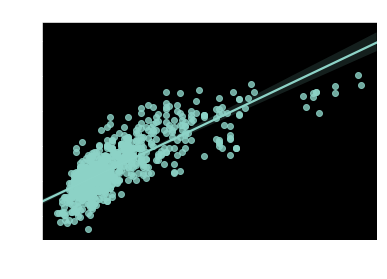

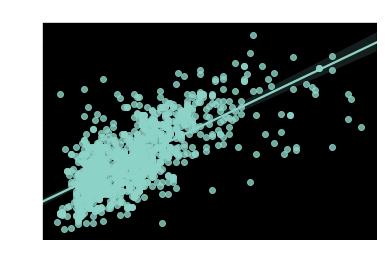

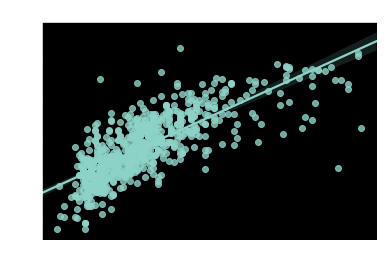

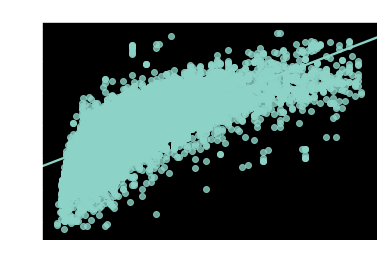

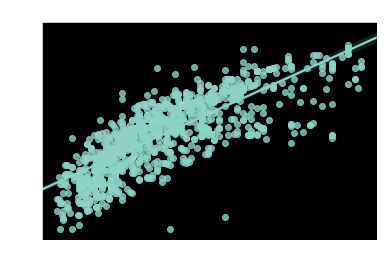

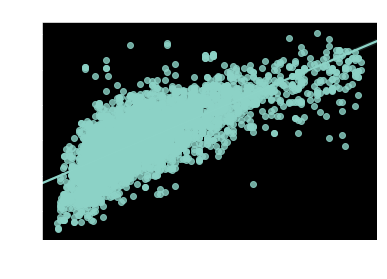

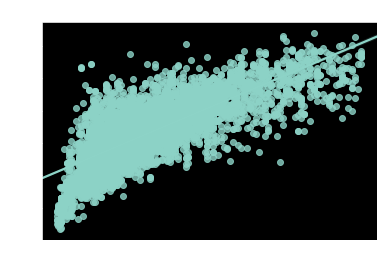

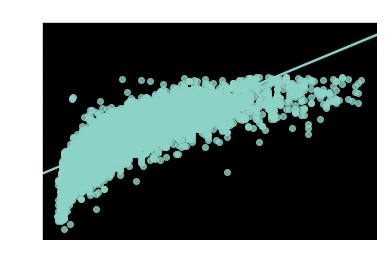

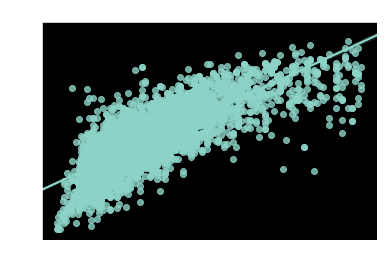

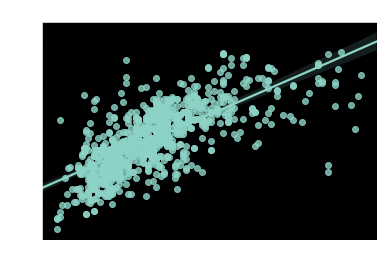

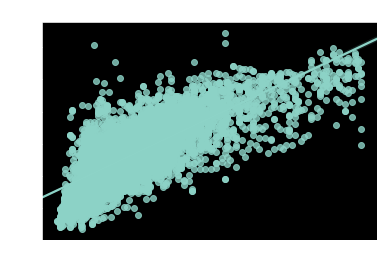

In [67]:
for param, group in non_outlier_data.groupby(['city']):
    sns.regplot(x='building_area',y='total_price_log',data=group);
    plt.title('City index: {}'.format(param))
    plt.show();